# Anatomy of Dataset and DataLoader

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# creating data

nOb, nF = 100, 20

data = np.random.randn(nOb, nF)

In [3]:
# converting into tensor

data_t = torch.tensor(data)

# some info
print('Numpy data: ', type(data), data.shape, data.dtype)
print('Tensor data: ', type(data_t), data_t.shape, data_t.dtype)

Numpy data:  <class 'numpy.ndarray'> (100, 20) float64
Tensor data:  <class 'torch.Tensor'> torch.Size([100, 20]) torch.float64


In [4]:
# converting data into other types
data_t2 = torch.tensor(data).float()
print(data_t2.dtype)

data_t3 = torch.tensor(data).long()  # long is for ints
print(data_t3.dtype)

torch.float32
torch.int64


In [5]:
# converting into pytorch datasets

ds = TensorDataset(data) # converting numpy array into dataset - not possible

TypeError: 'int' object is not callable

In [6]:
# converting a tensor data into dataaset

dataset = TensorDataset(data_t)
dataset.tensors

(tensor([[ 1.0796, -0.5601, -0.0794,  ..., -0.1082,  0.0551, -1.3876],
         [-0.8727,  0.1626,  0.4482,  ..., -0.2905,  2.3672,  1.2579],
         [ 0.3610, -1.3349, -1.3173,  ..., -1.5703,  0.9444, -1.1918],
         ...,
         [-1.3096,  0.2156,  0.1633,  ..., -0.6941, -0.0651,  0.4523],
         [-0.8149, -1.1991,  1.2333,  ...,  0.0452, -0.0601,  0.3250],
         [-0.3602, -0.7340, -0.2863,  ..., -0.3996,  0.9105,  1.3661]],
        dtype=torch.float64),)

Which is why we have to convert into tensors

In [7]:
# trying again with labels

labels = torch.ceil(torch.linspace(.01, 4, nOb))
labels = labels.reshape((len(labels), 1))
print(labels)

ds = TensorDataset(data_t, labels)
print(ds.tensors[0].shape)
print(ds.tensors[1].shape)

print(np.shape(np.random.randint(5,size=nOb)))

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
      

In [13]:
# dataloader creation

bs = 25 # batch size
dl = DataLoader(ds, bs)
dl.dataset.tensors[1].shape # tensors[0] - features, tensors[1] - labels

torch.Size([100, 1])

In [14]:
# batch size and info
# when dl is accessed iterably, that is when it is broken into batches
for feat, lbls in dl:
    print('Batch Info:', feat.shape, lbls.shape)

Batch Info: torch.Size([25, 20]) torch.Size([25, 1])
Batch Info: torch.Size([25, 20]) torch.Size([25, 1])
Batch Info: torch.Size([25, 20]) torch.Size([25, 1])
Batch Info: torch.Size([25, 20]) torch.Size([25, 1])


In [15]:
for feat, lbls in dl:
    print(feat, lbls.T)

tensor([[ 1.0796, -0.5601, -0.0794, -0.7200,  1.3560, -1.7731,  0.0994,  0.6327,
          2.5012, -0.3359,  0.0619,  0.9694, -1.1556,  0.6945,  0.6053,  1.6418,
         -0.2927, -0.1082,  0.0551, -1.3876],
        [-0.8727,  0.1626,  0.4482,  0.8265, -0.1165, -0.7301, -1.1484,  2.2052,
         -1.2156,  1.0337,  0.2495,  2.0933,  0.1724,  0.0814, -0.0554,  1.9024,
         -0.8210, -0.2905,  2.3672,  1.2579],
        [ 0.3610, -1.3349, -1.3173,  0.9973,  0.3315,  1.1053, -0.2302, -1.4933,
          1.3182, -0.5136, -0.8359, -0.6944,  0.6865,  0.4999,  1.3040,  0.4571,
         -0.3075, -1.5703,  0.9444, -1.1918],
        [ 0.6697, -0.2883,  0.4447, -0.6558, -0.8778,  0.5689, -1.9473, -0.8309,
          0.8230,  0.7170, -0.1439, -0.1548,  0.9290, -2.3727,  2.7892,  0.5843,
          0.2320, -0.5539, -2.3189, -1.0821],
        [ 1.7744, -0.7087,  2.1533, -0.3201, -1.3408,  1.3301, -0.7071,  2.2378,
         -0.1220, -1.2030, -0.3827,  0.8582, -0.5016, -0.3417, -1.5515, -0.7580,
      

If we mention ```shuffle=True``` in dataloader parameters, data loader gets reshuffled everytime it is called in as an iterable

In [22]:
dl = DataLoader(ds, bs, shuffle=True)

In [36]:
for feat, lbls in dl:
    print(lbls.T)

tensor([[1., 2., 4., 4., 1., 2., 4., 2., 4., 4., 1., 2., 3., 2., 2., 4., 2., 1.,
         3., 3., 1., 2., 3., 4., 1.]])
tensor([[3., 1., 4., 3., 2., 1., 1., 3., 4., 4., 4., 2., 2., 2., 1., 2., 2., 3.,
         1., 3., 3., 1., 3., 1., 1.]])
tensor([[3., 1., 2., 1., 2., 2., 4., 3., 2., 1., 3., 4., 3., 3., 1., 4., 1., 3.,
         4., 4., 2., 3., 4., 3., 3.]])
tensor([[1., 4., 1., 1., 2., 4., 3., 4., 1., 4., 1., 4., 4., 2., 2., 2., 2., 2.,
         4., 3., 3., 3., 3., 1., 4.]])


In [42]:
# to get only one batch 

feat, labs = next(iter(dl))
lbls.T

tensor([[1., 4., 1., 1., 2., 4., 3., 4., 1., 4., 1., 4., 4., 2., 2., 2., 2., 2.,
         4., 3., 3., 3., 3., 1., 4.]])

# Parametric exp- width vs depth

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [51]:
def createData(npc):

    A = [ 1, 1 ]
    B = [ 5, 1 ]
    C = [ 4, 3 ]

    # generate data
    a = [ A[0]+np.random.randn(npc) , A[1]+np.random.randn(npc) ]
    b = [ B[0]+np.random.randn(npc) , B[1]+np.random.randn(npc) ]
    c = [ C[0]+np.random.randn(npc) , C[1]+np.random.randn(npc) ]

    # true labels
    labels_np = np.hstack((  np.zeros((npc)),
                             np.ones( (npc)),
                           1+np.ones( (npc))  ))

    # concatanate into a matrix
    data_np = np.hstack((a,b,c)).T
    
    #outputting in a dictionary
    
    op = {}
    op['data'] = torch.tensor(data_np).float()
    op['labels'] = torch.tensor(labels_np).long()
    
    X_train, X_test, y_train, y_test = train_test_split(op['data'], op['labels'], test_size=.1)

    train_ds = TensorDataset(X_train, y_train)
    test_ds = TensorDataset(X_test, y_test)

    bs = 8
    op['train_data'] = DataLoader(train_ds, batch_size=bs, shuffle=True, drop_last=True)
    op['test_data'] = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])
    
    return op

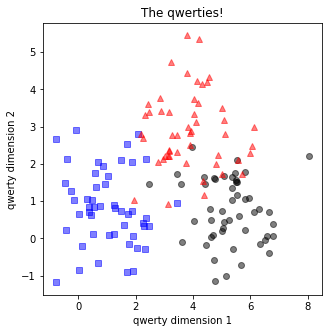

In [53]:
dt = createData(50)

data = dt['data']
labels = dt['labels']

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [57]:
def createNet(nUnits, nLayers):
    class qwertyNet(nn.Module):
        def __init__(self, nUnits, nLayers):
            super().__init__()

            self.layers = nn.ModuleDict() # dict to store layers of ANN
            self.nLayers = nLayers

            self.layers['inp'] = nn.Linear(2, nUnits) # input layer

            for i in range(nLayers): # hidden layers
                self.layers[f'hidden{i}']  = nn.Linear(nUnits, nUnits)

            self.layers['op'] = nn.Linear(nUnits, 3) # output layers

        def forward(self, x):
            x = self.layers['inp'](x)

            for i in range(self.nLayers):
                x = F.relu( self.layers[f'hidden{i}'](x) )

            x = self.layers['op'](x)

            return x
    
    net = qwertyNet(nUnits, nLayers)
    optim = torch.optim.SGD(net.parameters(), lr = 0.01)
    lossfn = nn.CrossEntropyLoss()
    
    return net, lossfn, optim

In [58]:
# test with fake data

nU, nL = 12, 4

net, lossfn, optim = createNet(nU, nL)
print(net)

ip = torch.rand(10, 2)
net(ip)

qwertyNet(
  (layers): ModuleDict(
    (inp): Linear(in_features=2, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (op): Linear(in_features=12, out_features=3, bias=True)
  )
)


tensor([[ 0.3980,  0.0979, -0.1664],
        [ 0.3957,  0.1002, -0.1680],
        [ 0.4017,  0.0951, -0.1640],
        [ 0.3974,  0.0993, -0.1675],
        [ 0.3932,  0.0976, -0.1645],
        [ 0.3954,  0.0955, -0.1634],
        [ 0.3951,  0.0970, -0.1646],
        [ 0.3977,  0.0988, -0.1671],
        [ 0.4008,  0.0950, -0.1645],
        [ 0.3948,  0.0977, -0.1652]], grad_fn=<AddmmBackward0>)

In [65]:
def trainNet(nUnits, nLayers):
    nEp = 50
    
    net, lossfn, optim = createNet(nU, nL)
    
    losses, trainAcc, testAcc = torch.zeros(nEp), [], []
    
    for i in range(nEp):
        
        batchAcc, batchLoss = [], []
        
        for X, y in train_data:
            yH = net(X)
            loss = lossfn(yH, y)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            batchLoss.append(loss.item())
            
            # compute accuracy
            matches = torch.argmax(yH,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # and get average losses across the batches
        losses[i] = np.mean(batchLoss)

        # test accuracy
        X,y = next(iter(test_data)) # extract X,y from test dataloader
        with torch.no_grad(): # deactivates autograd
            yH = net(X)

        # compare the following really long line of code to the training accuracy lines
        testAcc.append( 100*torch.mean((torch.argmax(yH,axis=1)==y).float()) ) 
      # end epochs

      # function output
    return trainAcc,testAcc,losses,net

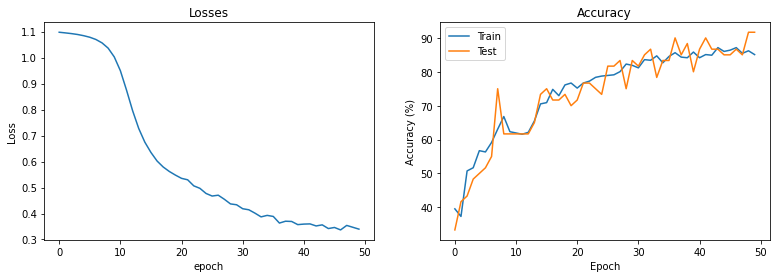

In [66]:
### Test the model once with a bit of data, just to make sure the code works.

# generate the data
theData = createData(200)
train_data = theData['train_data']
test_data  = theData['test_data']

# run the model
trainAcc,testAcc,losses,net = trainNet(80,1)



# show the results!
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()
plt.show()

### Parametric exp

check number of parameters first

In [69]:
nodes = 80 # number of nodes in the model
layers = [1, 5, 10, 20]
nDP = np.arange(50, 551, 50) # number of data points

legend = []

for idx, layer in enumerate(layers):
    
    units = int(nodes/layers[idx]) # number of nodes per layer
    net = createNet(units, layer)[0]
    
    # counting parameters
    nP = np.sum([p.numel() for p in net.parameters() if p.requires_grad])
    
    legend.append( '%s layers, %s units, %s params' %(layer,units,nP) )
    print('This model will have %s layers, each with %s units, totalling %s parameters' %(layer,units,nP))

This model will have 1 layers, each with 80 units, totalling 6963 parameters
This model will have 5 layers, each with 16 units, totalling 1459 parameters
This model will have 10 layers, each with 8 units, totalling 771 parameters
This model will have 20 layers, each with 4 units, totalling 427 parameters


In [72]:
res = np.zeros( (len(nDP), len(layers), 2) )

for didx, pnts in enumerate(nDP):
    theData = createData(pnts)
    train_data = theData['train_data']
    test_data = theData['test_data']
    
    for idx, layer in enumerate(layers):
    
        units = int(nodes/layers[idx]) # number of nodes per layer
        trainAcc, testAcc, losses, net = trainNet(units, layer)
        
        # accuracies and losses of last 5 epochs
        res[didx, idx, 0] = np.mean(testAcc[-5:])
        res[didx, idx, 1] = torch.mean(losses[-5:]).item()

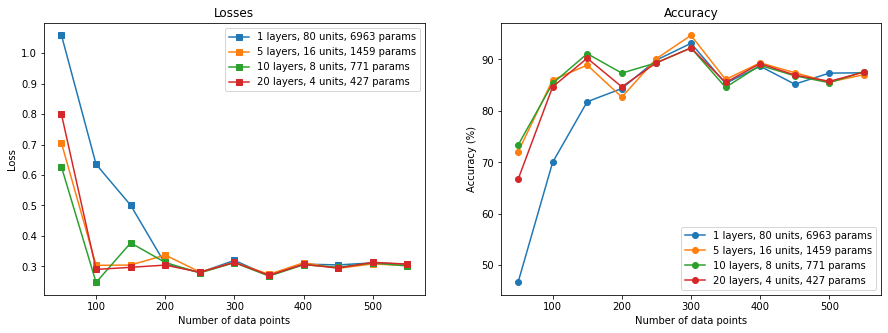

In [73]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(nDP,res[:,:,1],'s-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of data points')
ax[0].legend(legend)
ax[0].set_title('Losses')

ax[1].plot(nDP,res[:,:,0],'o-')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Number of data points')
ax[1].set_title('Accuracy')
ax[1].legend(legend)
plt.show()

# Dealing with imbalanced data

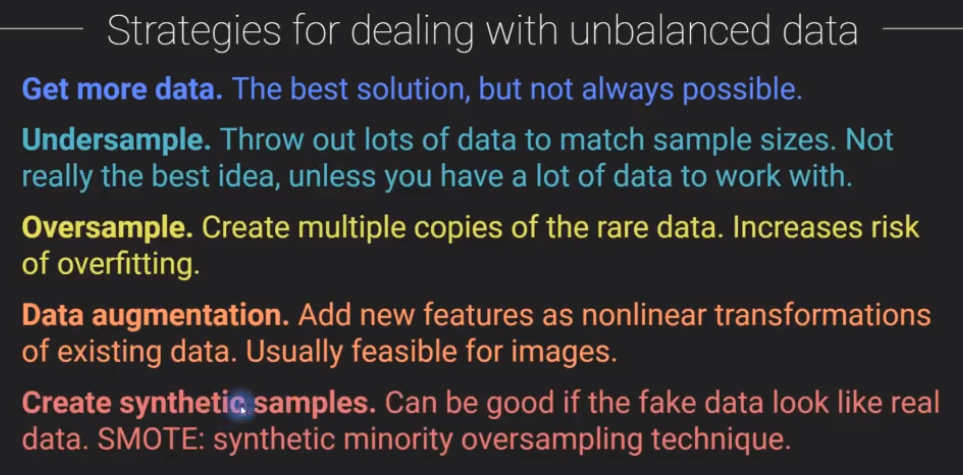

# Oversampling in MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [25]:
data_full = np.loadtxt(open('../data/mnist_train_small.csv', 'rb'), delimiter=',')

In [31]:
def makeData(N, doubleData=False):
    labels = data_full[:N,0]
    data = data_full[:N, 1:]
    
    dataNorm = data/np.max(data)
    
    # doubling data
#     if doubleData:
#         dataNorm = np.concatenate((dataNorm, dataNorm), axis=0)
#         labels = np.concatenate((labels, labels), axis=0)
        
    dataT = torch.tensor(dataNorm).float()
    labelsT = torch.tensor(labels).long()  # long = int64

    X_train, X_test, y_train, y_test = train_test_split(dataT, labelsT, test_size=.1)
    
    # doubling training data
    if doubleData:
        X_train = torch.cat((X_train, X_train), axis=0)
        y_train = torch.cat((y_train, y_train), axis=0)
        
    train_ds = TensorDataset(X_train, y_train)
    test_ds = TensorDataset(X_test, y_test)

    batchsize = 20
    trainLoader = DataLoader(train_ds, batch_size=batchsize, shuffle=True, drop_last=True)
    testLoader = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])
    
    return trainLoader, testLoader

In [32]:
def createMNISTNet():
    
    class MNISTNet(nn.Module):
        def __init__(self):
            super().__init__()
            self.ip = nn.Linear(784, 64)
            self.h1 = nn.Linear(64, 32)
            self.h2 = nn.Linear(32, 32)
            self.op = nn.Linear(32, 10)
        
        def forward(self, x):
            x = F.relu(self.ip(x))
            x = F.relu(self.h1(x))
            x = F.relu(self.h2(x))
            return self.op(x)
            # using log_softmax explicitly as NLLLoss is used 
            # instead of CELoss that implicitly computes softmax
            
    net = MNISTNet()
    
    lossfn = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(net.parameters(), lr=.01)
    
    return net, lossfn, optim

In [33]:
# function to train the model

def trainModel():
    
    nEp = 50
    net, lossfn, optim = createMNISTNet()
    losses, trainAcc, testAcc = torch.zeros(nEp), [], []
    
    # train loop
    for i in range(nEp):
        
        batchAcc, batchLoss = [], []
        
        # batch loop
        for x, y in trainLoader:
            yH = net(x)
            loss = lossfn(yH, y)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            batchLoss.append(loss.item())
            
            matches = torch.argmax(yH, axis=1) == y
            matchesNum = matches.float()
            accPt = 100*torch.mean(matchesNum)
            batchAcc.append(accPt)
        # end of batch loop
        
        trainAcc.append(np.mean(batchAcc))
        losses[i] = np.mean(batchLoss)
        
        X, y = next(iter(testLoader))
        yH = net(X)
        
        testAcc.append( 100*torch.mean((torch.argmax(yH,axis=1)==y).float()) )
    # end of training loop
    
    return net, trainAcc, testAcc, losses

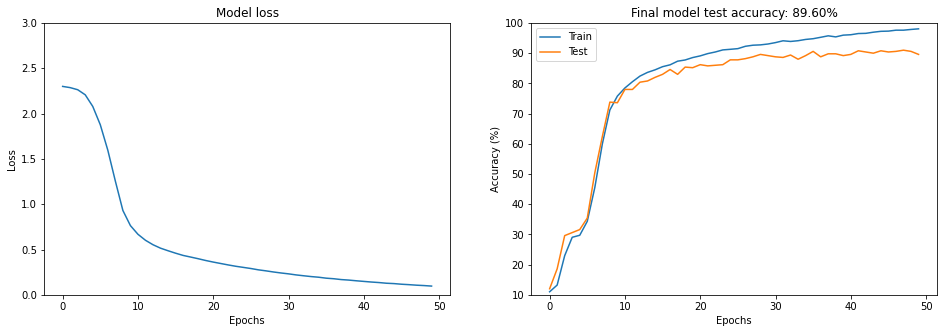

In [34]:
trainLoader, testLoader = makeData(5000)
net, trainAcc, testAcc, losses = trainModel()

# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

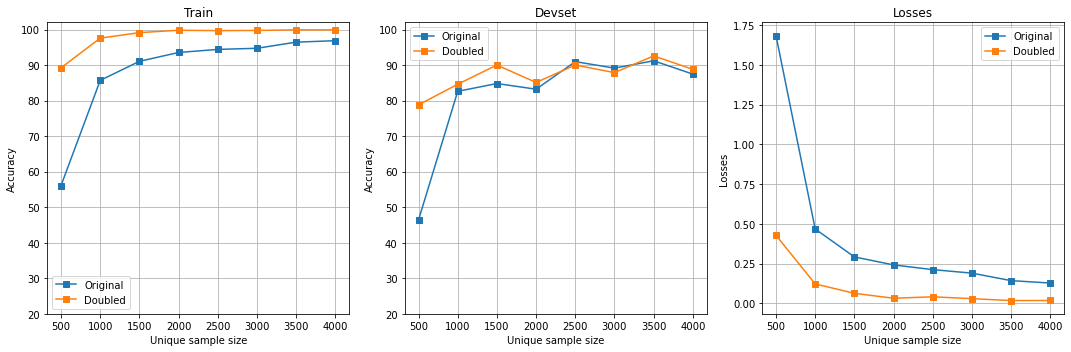

In [36]:
# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))

# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

    ### without doubling the data!

    # generate a dataset and train the model
    trainLoader,testLoader = makeData(ssize,False)
    net, trainAcc, testAcc, losses = trainModel()

    # grab the results
    resultsSingle[idx,0] = np.mean(trainAcc[-5:])
    resultsSingle[idx,1] = np.mean(testAcc[-5:])
    resultsSingle[idx,2] = torch.mean(losses[-5:]).item()


    ### with doubling the data!

    # generate a dataset and train the model
    trainLoader,testLoader = makeData(ssize,True)
    net, trainAcc, testAcc, losses = trainModel()

    # grab the results
    resultsDouble[idx,0] = np.mean(trainAcc[-5:])
    resultsDouble[idx,1] = np.mean(testAcc[-5:])
    resultsDouble[idx,2] = torch.mean(losses[-5:]).item()

# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):
    
    # plot the lines
    ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
    ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Doubled')

    # make it look nicer
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel('Unique sample size')
    ax[i].grid('on')

    if i<2:
        ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

# Data Noise augmentation

Noise agumentation helps improve performance, and minimize/prevent overfitting. It is a form of data regularization.

We double the samples, and have white noise added, with a range of [0,0.5] (half of image values range).

We have training, dev and test set

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
data_full = np.loadtxt(open('../data/mnist_train_small.csv', 'rb'), delimiter=',')

# normalizing data to [0,1]
data_full[:,1:] = data_full[:,1:]/np.max(data_full)

def makeData(N, doubleData=False):
    labels = data_full[:N,0]
    data = data_full[:N, 1:]
    
    dataNorm = data/np.max(data)
    
    # doubling data
    if doubleData:
        dataN = data + np.random.random_sample(data.shape)/2   # adding noise to data
        dataN[:,1:] = dataN[:,1:]/np.max(dataN)  # re-normalize the data as values may exceed 1 after noise addition
        data = np.concatenate((data, dataN), axis=0) #
        labels = np.concatenate((labels, labels), axis=0)
        
    dataT = torch.tensor(data).float()
    labelsT = torch.tensor(labels).long()  # long = int64

    
    # creating train and dev sets
    X_train, X_dev, y_train, y_dev = train_test_split(dataT, labelsT, test_size=.1)
    
    
#     # doubling only training data and adding noise to it
#     if doubleData:
#         TraindataN = X_train + torch.rand_like(X_train)/2
#         TraindataN[:,1:] = TraindataN[:,1:]/torch.max(TraindataN)
#         X_train = torch.cat((X_train, TraindataN), axis=0)
#         y_train = torch.cat((y_train, y_train), axis=0)
    
    # converting into datasets
    train_ds = TensorDataset(X_train, y_train)
    dev_ds = TensorDataset(X_dev, y_dev)

    batchsize = 20
    trainLoader = DataLoader(train_ds, batch_size=batchsize, shuffle=True, drop_last=True)
    devLoader = DataLoader(dev_ds, batch_size=dev_ds.tensors[0].shape[0])
    
    # creating a seperate test set
    test_data = torch.tensor(data_full[N:, 1:]).float()
    test_labels = torch.tensor(data_full[N:, 0]).long()
    
    return trainLoader, devLoader, (test_data, test_labels)

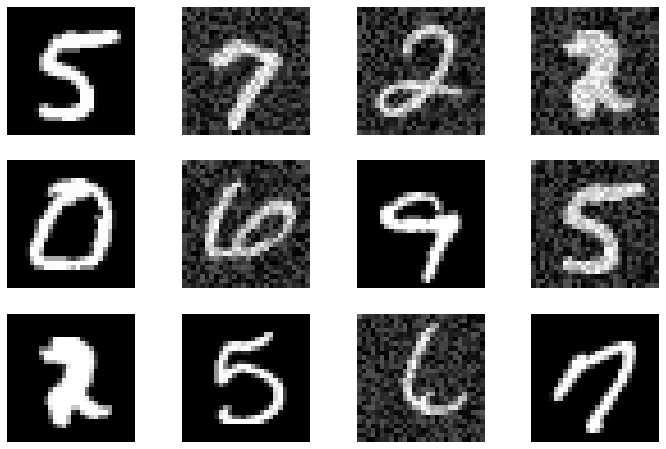

In [24]:
# visualize the images

# get some sample data
train_loader,devset_loader,testdataset = makeData(12,True)

# pop out the data matrices
img = train_loader.dataset.tensors[0].detach()

# show the numbers
fig,ax = plt.subplots(3,4,figsize=(12,8))
for i,ax in enumerate(ax.flatten()):
    ax.imshow(np.reshape(img[i,:],(28,28)) ,cmap='gray')
    ax.axis('off')
plt.show()

In [25]:
def createMNISTNet():
    
    class MNISTNet(nn.Module):
        def __init__(self):
            super().__init__()
            self.ip = nn.Linear(784, 64)
            self.h1 = nn.Linear(64, 32)
            self.h2 = nn.Linear(32, 32)
            self.op = nn.Linear(32, 10)
        
        def forward(self, x):
            x = F.relu(self.ip(x))
            x = F.relu(self.h1(x))
            x = F.relu(self.h2(x))
            return self.op(x)
            # using log_softmax explicitly as NLLLoss is used 
            # instead of CELoss that implicitly computes softmax
            
    net = MNISTNet()
    
    lossfn = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(net.parameters(), lr=.01)
    
    return net, lossfn, optim

# function to train the model

def trainModel():
    
    nEp = 50
    net, lossfn, optim = createMNISTNet()
    losses, trainAcc, devAcc = torch.zeros(nEp), [], []
    
    # train loop
    for i in range(nEp):
        
        batchAcc, batchLoss = [], []
        
        # batch loop
        for x, y in trainLoader:
            yH = net(x)
            loss = lossfn(yH, y)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            batchLoss.append(loss.item())
            
            matches = torch.argmax(yH, axis=1) == y
            matchesNum = matches.float()
            accPt = 100*torch.mean(matchesNum)
            batchAcc.append(accPt)
        # end of batch loop
        
        trainAcc.append(np.mean(batchAcc))
        losses[i] = np.mean(batchLoss)
        
        X, y = next(iter(devLoader))
        yH = net(X)
        
        devAcc.append( 100*torch.mean((torch.argmax(yH,axis=1)==y).float()) )
    # end of training loop
    
    return net, trainAcc, devAcc, losses

In [27]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

    ### without doubling the data!

    # generate a dataset and train the model
    trainLoader, devLoader, testdataset = makeData(ssize,False)
    net, trainAcc, devAcc, losses = trainModel()

    # grab the results
    resultsSingle[idx,0] = np.mean(trainAcc[-5:])
    resultsSingle[idx,1] = np.mean(devAcc[-5:])
    resultsSingle[idx,2] = torch.mean(losses[-5:]).item()


    ### with doubling the data!

    # generate a dataset and train the model
    trainLoader, devLoader, testdataset = makeData(ssize,True)
    net, trainAcc, devAcc, losses = trainModel()

    # grab the results
    resultsDouble[idx,0] = np.mean(trainAcc[-5:])
    resultsDouble[idx,1] = np.mean(devAcc[-5:])
    resultsDouble[idx,2] = torch.mean(losses[-5:]).item()


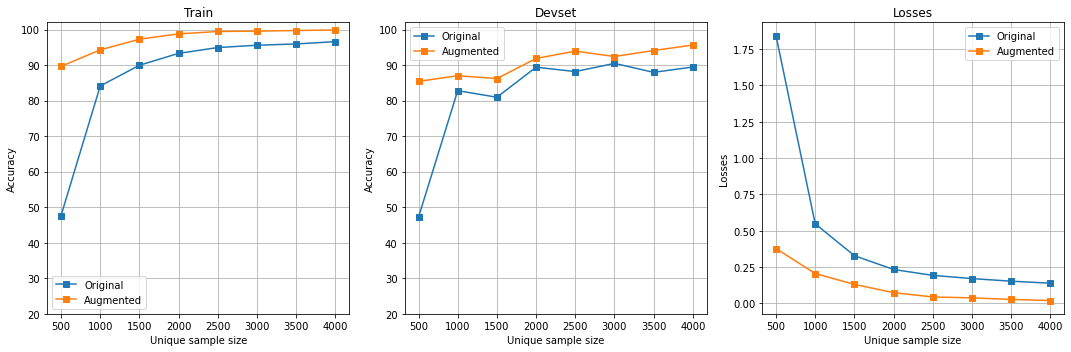

In [28]:
# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

    # plot the lines
    ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
    ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Augmented')

    # make it look nicer
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel('Unique sample size')
    ax[i].grid('on')

    if i<2:
        ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

### Now for test accuracy

We re-run the model for smaller samples - 500

In [33]:
samplesize = 500

trainLoader, devLoader, testdataset  = makeData(samplesize,False)
netO, trainAccO, devAccO, lossesO       = trainModel() # O = original

trainLoader, devLoader, testdataset  = makeData(samplesize,True)
netA, trainAccA, devAccA, lossesA       = trainModel() # O = original

In [35]:
# Now for the real test! On the test data!

# extract the test data
X,y = testdataset

# run the original model
yHat = netO(X)
testO = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# And the augmented model
yHat = netA(X)
testA = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# print the results!
print( f'ORIGINAL MODEL (N={samplesize}):\n  Train: {trainAccO[-1]:.2f}%, devset: {devAccO[-1]:.2f}%, test: {testO:.2f}%\n\n')
print(f'AUGMENTED MODEL (N={samplesize}):\n  Train: {trainAccA[-1]:.2f}%, devset: {devAccA[-1]:.2f}%, test: {testA:.2f}%')

ORIGINAL MODEL (N=500):
  Train: 45.68%, devset: 34.00%, test: 38.75%


AUGMENTED MODEL (N=500):
  Train: 89.11%, devset: 80.00%, test: 77.09%


# Data feature augmentation

/tmp/ipykernel_31807/1807341283.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


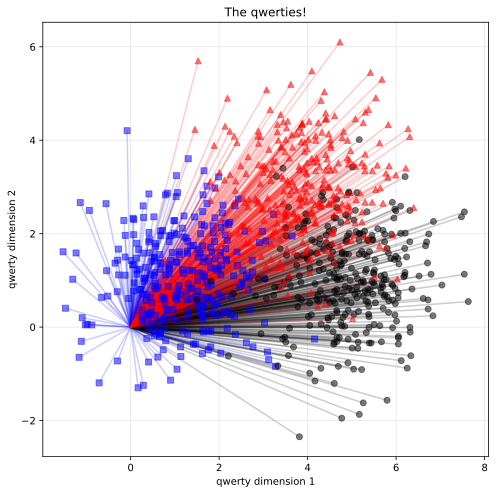

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(8,8))
# draw distance to origin
color = 'bkr'
for i in range(len(data)):
    plt.plot([0,data[i,0]],[0,data[i,1]],color=color[labels[i]],alpha=.2)

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)

plt.grid(color=[.9,.9,.9])
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

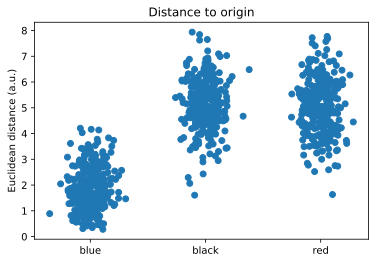

torch.Size([900, 2])
torch.Size([900, 3])
tensor([[ 0.1400,  1.7951,  1.8006],
        [ 0.5624,  0.2556,  0.6178],
        [-1.1384,  2.6654,  2.8983],
        ...,
        [ 3.8591,  3.9665,  5.5340],
        [ 2.9671,  2.5186,  3.8919],
        [ 2.5667,  2.1730,  3.3630]])


In [2]:
# compute Euclidean distance to the origin
dist2orig = torch.sqrt( data[:,0]**2 + data[:,1]**2 )

plt.plot(labels+torch.randn(900)/10,dist2orig,'o')
plt.xticks([0,1,2],labels=['blue','black','red'])
plt.ylabel('Euclidean distance (a.u.)')
plt.title('Distance to origin')
plt.show()

# Adding this to dataset

aug_data = torch.cat((data, dist2orig.view(len(data), 1)), axis=1)
print(data.shape)
print(aug_data.shape)
print(aug_data)

X_train, X_test, y_train, y_test = train_test_split(aug_data, labels, test_size=.1)

train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

bs = 16
trainLoader = DataLoader(train_ds, batch_size=bs, shuffle=True, drop_last=True)
testLoader = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])

In [3]:
# create a class for the model
def createTheQwertyNet(useExtraFeature=False):

    class qwertyNet(nn.Module):
        def __init__(self):
            super().__init__()

            ### input layer
            if useExtraFeature:
                self.input = nn.Linear(3,8)
            else:
                self.input = nn.Linear(2,8)

            ### hidden layer
            self.fc1 = nn.Linear(8,8)

            ### output layer
            self.output = nn.Linear(8,3)

        # forward pass
        def forward(self,x):

            # by request, only use XY features
#             print(x.shape) # comment out during training!
            if not useExtraFeature:
                x = x[:,:2]
#             print(x.shape) # comment out during training!

            x = F.relu( self.input(x) )
            x = F.relu( self.fc1(x) )
            return self.output(x)
  
    # create the model instance
    net = qwertyNet()

    # loss function
    lossfn = nn.CrossEntropyLoss()

    # optimizer
    optim = torch.optim.SGD(net.parameters(),lr=.001)

    return net, lossfn, optim

In [4]:
# test the model

print('Using augmented feature:')
net = createTheQwertyNet(True)[0]
net(next(iter(trainLoader))[0]);

print('\nNot using augmented feature:')
net = createTheQwertyNet(False)[0]
net(next(iter(trainLoader))[0]);

Using augmented feature:

Not using augmented feature:


In [5]:
# a function that trains the model

def function2trainTheModel(useExtraFeature=False):

  # number of epochs
  numepochs = 200
  
  # create a new model
  net,lossfun,optimizer = createTheQwertyNet(useExtraFeature)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in trainLoader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(testLoader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) ) 
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

In [6]:
def plotTheResults():

  # compute accuracy over entire dataset (train+test)
  yHat = net(aug_data)
  predictions = torch.argmax(yHat,axis=1)
  accuracy = (predictions == labels).float()

  # and accuracy by group
  accuracyByGroup = np.zeros(3)
  for i in range(3):
    accuracyByGroup[i] = 100*torch.mean(accuracy[labels==i])


  # create the figure
  fig,ax = plt.subplots(2,2,figsize=(10,6))

  # plot the loss function
  ax[0,0].plot(losses.detach())
  ax[0,0].set_ylabel('Loss')
  ax[0,0].set_xlabel('epoch')
  ax[0,0].set_title('Losses')

  # plot the accuracy functions
  ax[0,1].plot(trainAcc,label='Train')
  ax[0,1].plot(testAcc,label='Test')
  ax[0,1].set_ylabel('Accuracy (%)')
  ax[0,1].set_xlabel('Epoch')
  ax[0,1].set_title('Accuracy')
  ax[0,1].legend()

  # plot overall accuracy by group
  ax[1,0].bar(range(3),accuracyByGroup)
  ax[1,0].set_ylim([np.min(accuracyByGroup)-5,np.max(accuracyByGroup)+5])
  ax[1,0].set_xticks([0,1,2])
  ax[1,0].set_xlabel('Group')
  ax[1,0].set_ylabel('Accuracy (%)')
  ax[1,0].set_title('Accuracy by group')

  # scatterplot of correct and incorrect labeled data
  colorShapes = [ 'bs','ko','g^' ] # data markers
  for i in range(3):
    # plot all data points
    ax[1,1].plot(aug_data[labels==i,0],aug_data[labels==i,1],colorShapes[i],
                 alpha=.3,label=f'Group {i}')
    
    # cross-out the incorrect ones
    idxErr = (accuracy==0) & (labels==i)
    ax[1,1].plot(aug_data[idxErr,0],aug_data[idxErr,1],'rx')

  ax[1,1].set_title('All groups')
  ax[1,1].set_xlabel('qwerty dimension 1')
  ax[1,1].set_ylabel('qwerty dimension 2')
  ax[1,1].legend()
  
  plt.tight_layout()
  plt.show()

Final accuracy: 92.22%


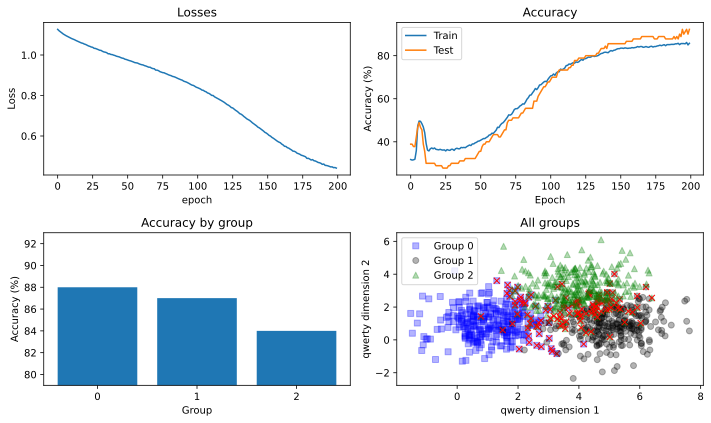

Final accuracy: 92.22%


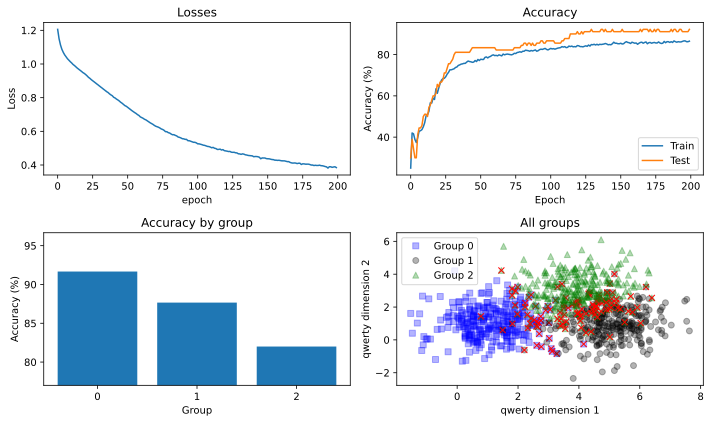

In [7]:
# run the model and visualize the results WITHOUT EXTRA FEATURE
trainAcc,testAcc,losses,net = function2trainTheModel(False)
print('Final accuracy: %.2f%%' %testAcc[-1].item())
plotTheResults()

# run the model and visualize the results WITH EXTRA FEATURE
trainAcc,testAcc,losses,net = function2trainTheModel(True)
print('Final accuracy: %.2f%%' %testAcc[-1].item())
plotTheResults()

In [8]:
# Run the experiment multiple times and do a t-test!
# (takes ~3 mins)

finalacc2 = np.zeros(10)
finalacc3 = np.zeros(10)

for i in range(10):
  finalacc2[i] = function2trainTheModel(False)[1][-1]
  finalacc3[i] = function2trainTheModel(True)[1][-1]

# show the numbers
print( np.round(np.vstack((finalacc2,finalacc3)).T,2) )

# run the t-test and print the results
from scipy import stats
t,p = stats.ttest_ind(finalacc3,finalacc2)
print('\n\nt=%.2f, p=%.2f' %(t,p))

[[90.   91.11]
 [91.11 92.22]
 [88.89 92.22]
 [90.   78.89]
 [88.89 85.56]
 [92.22 88.89]
 [91.11 93.33]
 [90.   88.89]
 [92.22 91.11]
 [91.11 90.  ]]


t=-0.95, p=0.35


# Save and load models

/tmp/ipykernel_31807/2537921934.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


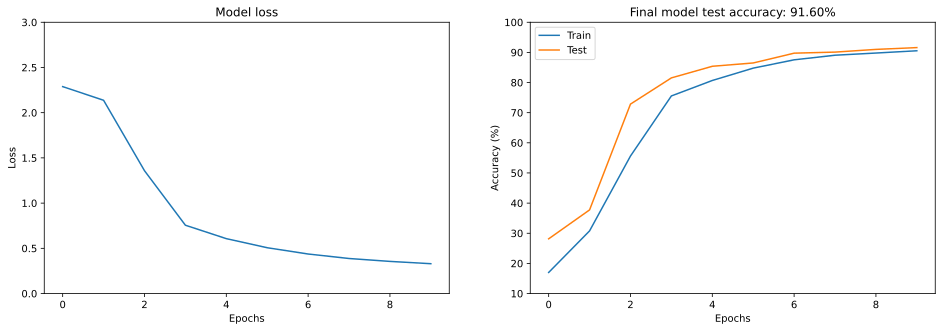

In [10]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


# import dataset (comes with colab!)
data = np.loadtxt(open('../data/mnist_train_small.csv','rb'),delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:,0]
data   = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# Step 1: convert to tensor
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long()

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])


# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return torch.log_softmax( self.output(x),axis=1 )
      # NEW HERE: log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.NLLLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

# a function that trains the model

def funtion2trainTheModel():

  # number of epochs
  numepochs = 10
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

trainAcc,testAcc,losses,net = funtion2trainTheModel()

fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

### Saving the model

we save using ```<model_name>.state_dict``` that holds all the weights, biases, and other properties of the model

In [11]:
torch.save(net.state_dict(), '../models/sample_trained_model.pt')

### Load model using different name

In [12]:
# create two new models of same class
m1, m2 = createTheMNISTNet()[0], createTheMNISTNet()[0]

# replacing model parameters with trained model's
m1.load_state_dict(torch.load('../models/sample_trained_model.pt'))

<All keys matched successfully>

### Showing that models are same

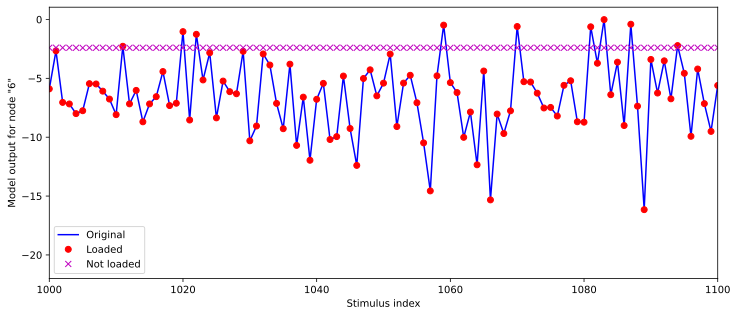

In [13]:
# get some data from the test loader
X,y = next(iter(test_loader))

# run the data through both models
yHatNet    = net(X)
yHatModel1 = m1(X)
yHatModel2 = m2(X)


# show that the results overlap
fig = plt.figure(figsize=(12,5))
plt.plot(yHatNet[:,5].detach(),'b',label='Original')
plt.plot(yHatModel1[:,5].detach(),'ro',label='Loaded')
plt.plot(yHatModel2[:,5].detach(),'mx',label='Not loaded')
plt.legend()
plt.xlabel('Stimulus index')
plt.ylabel('Model output for node "6"')
plt.xlim([1000,1100])

plt.show()

# Saving the best model

Highest "accuracy" was 94.41% in run 8.


/tmp/ipykernel_31807/541894466.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


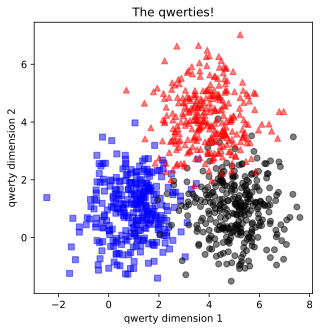

In [17]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import copy

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

theBest = [0,0]

for i in range(10):

  # "train the model"
  accuracy = np.random.rand()

  # see if this is better than any previous runs
  if accuracy>theBest[0]:
    theBest = [accuracy,i]


print(f'Highest "accuracy" was {100*theBest[0]:.2f}% in run {theBest[1]+1}.')

# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 4 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

   Total data size: torch.Size([900, 2])

Training data size: torch.Size([500, 2])
  Devset data size: torch.Size([200, 2])
    Test data size: torch.Size([200, 2])


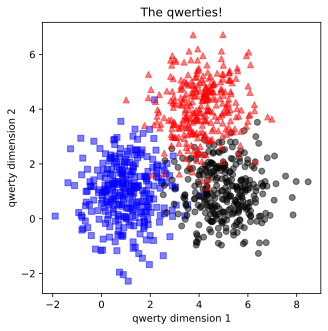

In [18]:
# specify sizes of the partitions
# order is train,devset,test
partitions = [3*nPerClust-400,200,200]

# split the data
train_data,devtest_data, train_labels,devtest_labels = train_test_split(data, labels, train_size=partitions[0])

# now split the devtest data
dev_data,test_data, dev_labels,test_labels = train_test_split(devtest_data, devtest_labels, train_size=partitions[1])


# print out the sizes
print('   Total data size: ' + str(data.shape) + '\n')
print('Training data size: ' + str(train_data.shape))
print('  Devset data size: ' + str(dev_data.shape))
print('    Test data size: ' + str(test_data.shape))

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
dev_data   = TensorDataset(dev_data,dev_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 30
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
dev_loader   = DataLoader(dev_data,batch_size=dev_data.tensors[0].shape[0])
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# Create and validate the model

# create a class for the model
def createTheQwertyNet():

  class qwertyNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(2,8)
      
      ### hidden layer
      self.fc1 = nn.Linear(8,8)

      ### output layer
      self.output = nn.Linear(8,3)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      return self.output(x)
  
  # create the model instance
  net = qwertyNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer


# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 4 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

   Total data size: torch.Size([900, 2])

Training data size: torch.Size([500, 2])
  Devset data size: torch.Size([200, 2])
    Test data size: torch.Size([200, 2])


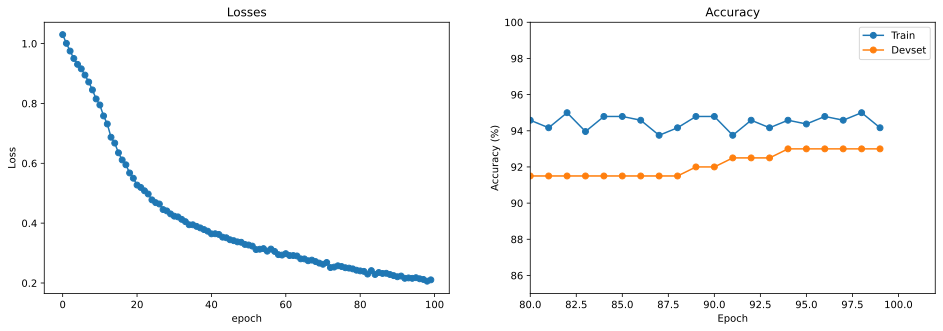

In [27]:
# specify sizes of the partitions
# order is train,devset,test
partitions = [3*nPerClust-400,200,200]

# split the data
train_data,devtest_data, train_labels,devtest_labels = train_test_split(data, labels, train_size=partitions[0])

# now split the devtest data
dev_data,test_data, dev_labels,test_labels = train_test_split(devtest_data, devtest_labels, train_size=partitions[1])


# print out the sizes
print('   Total data size: ' + str(data.shape) + '\n')
print('Training data size: ' + str(train_data.shape))
print('  Devset data size: ' + str(dev_data.shape))
print('    Test data size: ' + str(test_data.shape))

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
dev_data   = TensorDataset(dev_data,dev_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 30
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
dev_loader   = DataLoader(dev_data,batch_size=dev_data.tensors[0].shape[0])
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# Create and validate the model

# create a class for the model
def createTheQwertyNet():

  class qwertyNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(2,8)
      
      ### hidden layer
      self.fc1 = nn.Linear(8,8)

      ### output layer
      self.output = nn.Linear(8,3)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      return self.output(x)
  
  # create the model instance
  net = qwertyNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer
def funtion2trainTheModel():

  # New! initialize a dictionary for the best model
  theBestModel = {'Accuracy':0, 'net':None}


  # number of epochs
  numepochs = 100
  
  # create a new model
  net,lossfun,optimizer = createTheQwertyNet()

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  devAcc   = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    net.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(dev_loader)) # extract X,y from devset dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    devAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )


    # New! Store this model if it's the best so far
    if devAcc[-1]>theBestModel['Accuracy']:
      
      # new best accuracy
      theBestModel['Accuracy'] = devAcc[-1].item()
      
      # model's internal state
      theBestModel['net'] = copy.deepcopy( net.state_dict() )
      
  # end epochs

  # function output
  return trainAcc,devAcc,losses,theBestModel


# run the model
trainAcc,devAcc,losses,theBestModel = funtion2trainTheModel()

fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses.detach(),'o-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc,'o-',label='Train')
ax[1].plot(devAcc,'o-',label='Devset')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].set_ylim([85,100])
ax[1].set_xlim([80,102])
ax[1].legend()
plt.show()

In [28]:
theBestModel

{'Accuracy': 93.0,
 'net': OrderedDict([('input.weight',
               tensor([[ 0.0386,  0.0797],
                       [-0.3308, -0.3024],
                       [ 0.2458, -0.1039],
                       [ 0.7746, -0.4616],
                       [ 0.7722,  0.0417],
                       [ 0.7525,  0.4629],
                       [ 0.1057,  1.0383],
                       [-0.1840,  0.6223]])),
              ('input.bias',
               tensor([-0.5601,  0.4681,  0.6478, -0.6740,  0.0403, -0.5644, -0.0537, -0.1926])),
              ('fc1.weight',
               tensor([[ 0.2996,  0.0285, -0.3716,  0.6539,  0.3949,  0.7083, -0.0704, -0.3334],
                       [ 0.2704, -0.0311,  0.1420, -0.1707,  0.0379, -0.3304, -0.2790,  0.0901],
                       [ 0.3015, -0.2155,  0.1105,  0.3287, -0.1994, -0.1589,  0.1310,  0.3081],
                       [-0.0706,  0.0770,  0.0531, -0.2591, -0.2661,  0.3280,  0.5798,  0.3170],
                       [ 0.1812,  0.2288,  0.1970,  

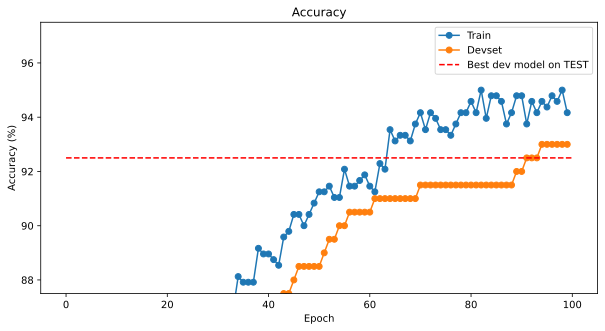

In [29]:
# extract X,y from test dataloader
X,y = next(iter(test_loader)) 

# yHat = theBestModel['net'](X)

# recreate the best-performing model
bestnet = createTheQwertyNet()[0]
bestnet.load_state_dict(theBestModel['net'])


# and run the data through TEST
X,y = next(iter(test_loader)) 
yHat = bestnet(X)

bestAcc = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())
bestAcc

fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'o-',label='Train')
plt.plot(devAcc,'o-',label='Devset')
plt.plot([0,len(devAcc)],[bestAcc,bestAcc],'r--',label='Best dev model on TEST')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.ylim([bestAcc-5,bestAcc+5])
plt.legend()
plt.show()